## Генерация битовых образов с предопределёнными параметрами

In [ ]:
import random
from deap import base, creator, tools


def evaluation_function(chromosome):
    target_count = 45
    return len(chromosome) - abs(sum(chromosome) - target_count),


def build_toolbox(bits_count):
    creator.create("FitnessMaximum", base.Fitness, weights=(1.0,))
    creator.create("Candidate", list, fitness=creator.FitnessMaximum)
    
   
    toolbox = base.Toolbox()
    
   
    toolbox.register("gene_bit", random.randint, 0, 1)
    
   
    toolbox.register("candidate", tools.initRepeat, 
                     creator.Candidate, toolbox.gene_bit, bits_count)
    
   
    toolbox.register("population_group", tools.initRepeat, list, toolbox.candidate)
    
   
    toolbox.register("assess", evaluation_function)
    
   
    toolbox.register("combine", tools.cxTwoPoint)
    
   
    toolbox.register("alter", tools.mutFlipBit, indpb=0.04)
    
   
    toolbox.register("pick", tools.selTournament, tournsize=4)
    
    return toolbox

if __name__ == "__main__":
 
    genes_number = 75
    
   
    toolbox = build_toolbox(genes_number)
    
    
    random.seed(9)
    
   
    population = toolbox.population_group(n=600)
    
    
    crossover_prob, mutation_prob = 0.55, 0.20
    
  
    generations_count = 65
    
    print('\nЗапуск процесса эволюции')
    
  
    fitness_scores = list(map(toolbox.assess, population))
    for candidate, score in zip(population, fitness_scores):
        candidate.fitness.values = score
    
    print('\nОценено', len(population), 'кандидатов')
    

    for generation in range(generations_count):
        print("\n===== Поколение", generation)
        
      
        children = toolbox.pick(population, len(population))
        
       
        children = list(map(toolbox.clone, children))
        
     
        for child_a, child_b in zip(children[::3], children[1::2]):
         
            if random.random() < crossover_prob:
                toolbox.combine(child_a, child_b)
              
                del child_a.fitness.values
                del child_b.fitness.values
        
        
        for mutant in children:
         
            if random.random() < mutation_prob:
                toolbox.alter(mutant)
                del mutant.fitness.values
        
      
        invalid_candidates = [cand for cand in children if not cand.fitness.valid]
        fitness_scores = map(toolbox.assess, invalid_candidates)
        for cand, score in zip(invalid_candidates, fitness_scores):
            cand.fitness.values = score
        
        print('Оценено', len(invalid_candidates), 'кандидатов')
        
    
        population[:] = children
        
      
        scores = [cand.fitness.values[0] for cand in population]
        total = len(population)
        average = sum(scores) / total
        sum_squared = sum(x*x for x in scores)
        deviation = abs(sum_squared / total - average**2)**0.5
        
        print('Минимум =', min(scores), ', Максимум =', max(scores))
        print('Среднее =', round(average, 2), ', Стандартное отклонение =', round(deviation, 2))
    
    print("\n==== Конец эволюции")
    
  
    best_candidate = tools.selBest(population, 1)[0]
    print('\nЛучший кандидат:\n', best_candidate)
    print('\nКоличество единиц: ', sum(best_candidate))


Запуск процесса эволюции

Оценено 600 кандидатов

===== Поколение 0
Оценено 285 кандидатов
Минимум = 63.0 , Максимум = 75.0
Среднее = 71.25 , Стандартное отклонение = 2.48

===== Поколение 1
Оценено 280 кандидатов
Минимум = 65.0 , Максимум = 75.0
Среднее = 73.21 , Стандартное отклонение = 1.58

===== Поколение 2
Оценено 285 кандидатов
Минимум = 66.0 , Максимум = 75.0
Среднее = 73.83 , Стандартное отклонение = 1.46

===== Поколение 3
Оценено 282 кандидатов
Минимум = 68.0 , Максимум = 75.0
Среднее = 74.06 , Стандартное отклонение = 1.36

===== Поколение 4
Оценено 273 кандидатов
Минимум = 68.0 , Максимум = 75.0
Среднее = 74.11 , Стандартное отклонение = 1.41

===== Поколение 5
Оценено 275 кандидатов
Минимум = 68.0 , Максимум = 75.0
Среднее = 74.22 , Стандартное отклонение = 1.32

===== Поколение 6
Оценено 289 кандидатов
Минимум = 66.0 , Максимум = 75.0
Среднее = 74.06 , Стандартное отклонение = 1.57

===== Поколение 7
Оценено 283 кандидатов
Минимум = 68.0 , Максимум = 75.0
Среднее = 74.2

iteration	evaluations	deviation	lowest 	mean   	highest
0        	459        	193.449  	695.439	1173.02	1770.43
1        	459        	294.844  	478.172	1142.32	2778.64
2        	459        	462.803  	354.575	1271.5 	3174.89
3        	459        	560.588  	508.84 	1566.73	3958.39
4        	459        	538.808  	536.278	1589.26	4637.79
5        	459        	442.123  	561.914	1394.26	3572.89
6        	459        	366.722  	435.78 	1180.4 	2893.35
7        	459        	299.668  	399.295	965.327	2475.87
8        	459        	237.24   	332.816	799.728	1648.39
9        	459        	182.928  	295.038	674.583	1303.1 
10       	459        	142.727  	267.875	579.998	1119.07
11       	459        	111.571  	210.006	456.779	824.085
12       	459        	83.6845  	193.857	400.391	773.455
13       	459        	71.6061  	202.079	352.517	617.113
14       	459        	59.4652  	187.359	328.353	561.645
15       	459        	51.2686  	167.967	292.457	498.513
16       	459        	47.6145  	146.144	267.639	

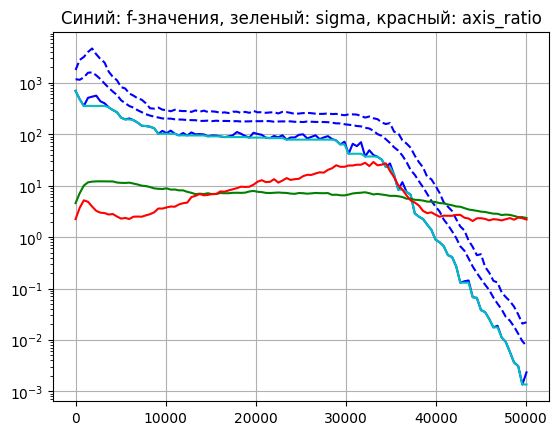

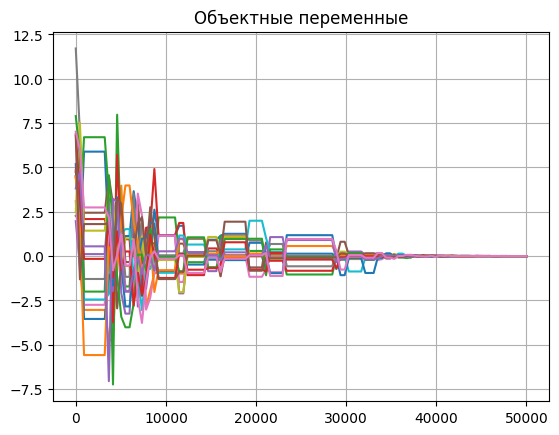

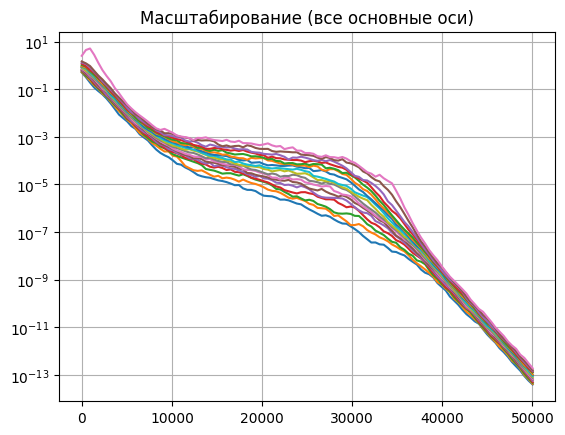

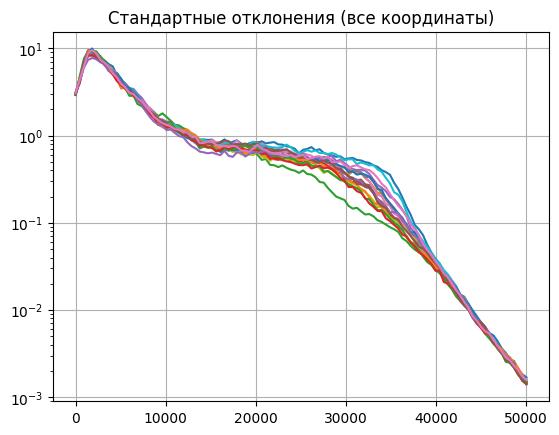

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from deap import algorithms, base, benchmarks, cma, creator, tools


def build_toolkit(evolution_strategy):
    creator.create("MinFitness", base.Fitness, weights=(-1.0,))
    creator.create("Solution", list, fitness=creator.MinFitness)
    
    toolkit = base.Toolbox()
    toolkit.register("assess", benchmarks.rastrigin)
    
   
    np.random.seed(13)
    
    toolkit.register("produce", evolution_strategy.generate, creator.Solution)
    toolkit.register("refresh", evolution_strategy.update)
    
    return toolkit

if __name__ == "__main__":
  
    solution_size = 17
    total_iterations = 110
    
   
    evolution_strategy = cma.Strategy(centroid=[7.0]*solution_size,
                                     sigma=3.0,
                                     lambda_=27*solution_size)
    
    
    toolkit = build_toolkit(evolution_strategy)
    

    elite_solutions = tools.HallOfFame(1)
    
 
    performance_stats = tools.Statistics(lambda x: x.fitness.values)
    performance_stats.register("mean", np.mean)
    performance_stats.register("deviation", np.std)
    performance_stats.register("lowest", np.min)
    performance_stats.register("highest", np.max)
    
   
    evolution_log = tools.Logbook()
    evolution_log.header = "iteration", "evaluations", "deviation", "lowest", "mean", "highest"
    
   
    sigma_values = np.ndarray((total_iterations, 1))
    axis_ratio_values = np.ndarray((total_iterations, 1))
    diagonal_matrix = np.ndarray((total_iterations, solution_size))
    best_fitness = np.ndarray((total_iterations, 1))
    optimal_solutions = np.ndarray((total_iterations, solution_size))
    deviation_values = np.ndarray((total_iterations, solution_size))
    
  
    for iteration in range(total_iterations):
      
        current_population = toolkit.produce()
        
      
        fitness_results = toolkit.map(toolkit.assess, current_population)
        for solution, fitness_score in zip(current_population, fitness_results):
            solution.fitness.values = fitness_score
        
       
        toolkit.refresh(current_population)
        
       
        elite_solutions.update(current_population)
        iteration_record = performance_stats.compile(current_population)
        evolution_log.record(evaluations=len(current_population), iteration=iteration, **iteration_record)
        print(evolution_log.stream)
        
      
        sigma_values[iteration] = evolution_strategy.sigma
        axis_ratio_values[iteration] = max(evolution_strategy.diagD)**2 / min(evolution_strategy.diagD)**2
        diagonal_matrix[iteration, :solution_size] = evolution_strategy.diagD**4
        best_fitness[iteration] = elite_solutions[0].fitness.values
        optimal_solutions[iteration, :solution_size] = elite_solutions[0]
        deviation_values[iteration, :solution_size] = np.std(current_population, axis=0)
    
 
    x_values = list(range(0, evolution_strategy.lambda_ * total_iterations, evolution_strategy.lambda_))
    mean_values, highest_values, lowest_values = evolution_log.select("mean", "highest", "lowest")
    
    plt.figure()
    plt.semilogy(x_values, mean_values, "--b")
    plt.semilogy(x_values, highest_values, "--b")
    plt.semilogy(x_values, lowest_values, "-b")
    plt.semilogy(x_values, best_fitness, "-c")
    plt.semilogy(x_values, sigma_values, "-g")
    plt.semilogy(x_values, axis_ratio_values, "-r")
    plt.grid(True)
    plt.title("Синий: f-значения, зеленый: sigma, красный: axis_ratio")
    
    plt.figure()
    plt.plot(x_values, optimal_solutions)
    plt.grid(True)
    plt.title("Объектные переменные")
    
    plt.figure()
    plt.semilogy(x_values, diagonal_matrix)
    plt.grid(True)
    plt.title("Масштабирование (все основные оси)")
    
    plt.figure()
    plt.semilogy(x_values, deviation_values)
    plt.grid(True)
    plt.title("Стандартные отклонения (все координаты)")
    
    plt.show()

In [ ]:
import operator
import math
import random
import numpy as np
from deap import algorithms, base, creator, tools, gp


def division_operator(numerator, denominator):
    if denominator == 0:
        return 1
    return numerator / denominator


def eval_func(individual, points):

    f = toolbox.compile(expr=individual)
    
   
    mse = ((f(x) - (3 * x**3 - 3 * x**2 + 5 * x - 1))**2 for x in points)
    return math.fsum(mse) / len(points),


def create_toolbox():
    pset = gp.PrimitiveSet("MAIN", 1)
    pset.addPrimitive(operator.add, 2)
    pset.addPrimitive(operator.sub, 2)
    pset.addPrimitive(operator.mul, 2)
    pset.addPrimitive(division_operator, 2)
    pset.addPrimitive(operator.neg, 1)
    pset.addPrimitive(math.cos, 1)
    pset.addPrimitive(math.sin, 1)
    

    pset.addEphemeralConstant("rand101", lambda: random.randint(-1, 1))
    
 
    pset.renameArguments(ARG0='x')
    
   
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)
    
    
    toolbox = base.Toolbox()
    toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("compile", gp.compile, pset=pset)
    toolbox.register("evaluate", eval_func, points=[x/10. for x in range(-10, 10)])
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
    
    toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
    toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
    
    return toolbox

if __name__ == "__main__":
    random.seed(15)
    
  
    toolbox = create_toolbox()
    
   
    population = toolbox.population(n=400)
    hall_of_fame = tools.HallOfFame(1)
    
    
    stats_fit = tools.Statistics(lambda x: x.fitness.values)
    stats_size = tools.Statistics(len)
    
   
    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", np.mean)
    mstats.register("std", np.std)
    mstats.register("min", np.min)
    mstats.register("max", np.max)
    
    
    probab_crossover = 0.2
    probab_mutate = 0.4
    num_generations = 70
    
   
    population, log = algorithms.eaSimple(population, toolbox,
                                         probab_crossover, probab_mutate, num_generations,
                                         stats=mstats, halloffame=hall_of_fame, verbose=True)

   	      	                    fitness                    	                      size                     
   	      	-----------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max    	min    	nevals	std    	avg   	gen	max	min	nevals	std    
0  	400   	25.4241	0  	57.3631	13.0466	400   	6.48871	3.8525	0  	7  	2  	400   	1.64339
1  	201   	22.1753	1  	79.2835	11.6355	201   	5.94416	4.3125	1  	13 	1  	201   	2.21807
2  	210   	23.0023	2  	1072.96	9.60015	210   	52.7854	4.5825	2  	14 	1  	210   	2.40067
3  	185   	19.2481	3  	56.9631	5.81385	185   	6.01503	5.155 	3  	15 	1  	185   	2.65254
4  	225   	17.9268	4  	52.5932	5.81385	225   	5.44368	5.7225	4  	17 	1  	225   	3.09281
5  	226   	16.9878	5  	93.2062	5.81385	226   	6.58667	6.6825	5  	21 	1  	226   	3.28735
6  	210   	20.9941	6  	1143.38	5.81385	210   	79.7569	7.54  	6  	20 	1  	210   	3.26166
7  	209   	14.5151	7  	45.6253	2.03056	209   	6.53027	8.53  	7  	23 	1  	209   	3.

In [ ]:
import copy
import random
from functools import partial
import numpy as np
from deap import algorithms, base, creator, tools, gp


class RobotController(object):
    def __init__(self, maximum_moves):
        self.maximum_moves = maximum_moves
        self.move_counter = 0
        self.targets_collected = 0
        self.execution_routine = None
     
        self.compass_directions = ["north", "east", "south", "west"]
        self.row_movement = [1, 0, -1, 0]
        self.column_movement = [0, 1, 0, -1]
    
    def _initialize_state(self):
        self.current_row = self.starting_row
        self.current_column = self.starting_column
        self.current_direction = 0
        self.move_counter = 0
        self.targets_collected = 0
        self.game_grid_copy = copy.deepcopy(self.game_grid)
    
    def _conditional_execution(self, condition_check, action_true, action_false):
        action_true() if condition_check() else action_false()
    
    def rotate_left(self):
        if self.move_counter < self.maximum_moves:
            self.move_counter += 1
            self.current_direction = (self.current_direction - 1) % 4
    
    def rotate_right(self):
        if self.move_counter < self.maximum_moves:
            self.move_counter += 1
            self.current_direction = (self.current_direction + 1) % 4
    
    def advance_forward(self):
        if self.move_counter < self.maximum_moves:
            self.move_counter += 1
            self.current_row = (self.current_row + self.row_movement[self.current_direction]) % self.grid_rows
            self.current_column = (self.current_column + self.column_movement[self.current_direction]) % self.grid_columns
            if self.game_grid_copy[self.current_row][self.current_column] == "target":
                self.targets_collected += 1
                self.game_grid_copy[self.current_row][self.current_column] = "visited"
    
    def detect_target_ahead(self):
        next_row = (self.current_row + self.row_movement[self.current_direction]) % self.grid_rows
        next_column = (self.current_column + self.column_movement[self.current_direction]) % self.grid_columns
        return self.game_grid_copy[next_row][next_column] == "target"
    
    def conditional_if_target(self, action_if_true, action_if_false):
        return partial(self._conditional_execution, self.detect_target_ahead, action_if_true, action_if_false)
    
    def execute_program(self, program_routine):
        self._initialize_state()
        while self.move_counter < self.maximum_moves:
            program_routine()
    
    def load_game_map(self, map_data):
        self.game_grid = list()
        for row_index, map_row in enumerate(map_data):
            self.game_grid.append(list())
            for column_index, cell_content in enumerate(map_row):
                if cell_content == "#":
                    self.game_grid[-1].append("target")
                elif cell_content == ".":
                    self.game_grid[-1].append("empty")
                elif cell_content == "S":
                    self.game_grid[-1].append("empty")
                    self.starting_row = self.current_row = row_index
                    self.starting_column = self.current_column = column_index
                    self.current_direction = 0
        self.grid_rows = len(self.game_grid)
        self.grid_columns = len(self.game_grid[0])
        self.game_grid_copy = copy.deepcopy(self.game_grid)


class ProgramBuilder(object):
    def _execute_sequence(self, self_ref, *actions):
        for action in actions:
            action()
    
    def sequence_two(self, action_one, action_two):
        return partial(self._execute_sequence, self, action_one, action_two)
    
    def sequence_three(self, action_one, action_two, action_three):
        return partial(self._execute_sequence, self, action_one, action_two, action_three)


robot_instance = None
primitive_collection = None


def evaluate_individual(program_individual):
    global robot_instance, primitive_collection
    compiled_program = gp.compile(program_individual, primitive_collection)
    robot_instance.execute_program(compiled_program)
    return robot_instance.targets_collected,


def build_evolution_toolkit():
    global robot_instance, primitive_collection
    primitive_collection = gp.PrimitiveSet("MAIN", 0)
    primitive_collection.addPrimitive(robot_instance.conditional_if_target, 2)
    primitive_collection.addPrimitive(ProgramBuilder().sequence_two, 2)
    primitive_collection.addPrimitive(ProgramBuilder().sequence_three, 3)
    primitive_collection.addTerminal(robot_instance.advance_forward)
    primitive_collection.addTerminal(robot_instance.rotate_left)
    primitive_collection.addTerminal(robot_instance.rotate_right)
    
    creator.create("MaximizeFitness", base.Fitness, weights=(1.0,))
    creator.create("ProgramIndividual", gp.PrimitiveTree, fitness=creator.MaximizeFitness)
    
    evolution_toolkit = base.Toolbox()
    
    evolution_toolkit.register("expr_init", gp.genFull, pset=primitive_collection, min_=1, max_=2)
    evolution_toolkit.register("individual", tools.initIterate, creator.ProgramIndividual, evolution_toolkit.expr_init)
    evolution_toolkit.register("population", tools.initRepeat, list, evolution_toolkit.individual)
    evolution_toolkit.register("evaluate", evaluate_individual)  
    evolution_toolkit.register("select", tools.selTournament, tournsize=7)  
    evolution_toolkit.register("mate", gp.cxOnePoint)  
    evolution_toolkit.register("expr_mut", gp.genFull, min_=0, max_=2)
    evolution_toolkit.register("mutate", gp.mutUniform, expr=evolution_toolkit.expr_mut, pset=primitive_collection)  
    
    return evolution_toolkit


if __name__ == "__main__":
    global robot_instance
    random.seed(6)
    
    move_limit = 755
    robot_instance = RobotController(move_limit)
    
    evolution_toolkit = build_evolution_toolkit()
    
    game_map = [
        "S##.................\n",
        "..#.................\n",
        "...######...####....\n",
        "........#...........\n",
        "........#...........\n",
        "........#####.......\n",
        "............#.......\n",
        "............#.......\n",
        "............#.......\n",
        ".........#...#......\n",
        "..........#...#.....\n",
        "...........#...#....\n",
        "...##..####....#....\n",
        ".#.............#....\n",
        ".#.............#....\n",
        ".#......#######.....\n",
        ".#....#.............\n",
        "......#.............\n",
        "..####..............\n",
        ".........#####......\n"
    ]
    
    with open('target_map.txt', 'w') as file_output:
        file_output.writelines(game_map)
    
    with open('target_map.txt', 'r') as file_input:
        robot_instance.load_game_map(file_input)
    
    candidate_population = evolution_toolkit.population(n=350)
    best_solutions = tools.HallOfFame(1)
    
    performance_stats = tools.Statistics(lambda x: x.fitness.values)
    performance_stats.register("average", np.mean)
    performance_stats.register("deviation", np.std)
    performance_stats.register("minimum", np.min)
    performance_stats.register("maximum", np.max)
    
    crossover_rate = 0.3
    mutation_rate = 0.6
    generation_count = 66
    
    algorithms.eaSimple(candidate_population, evolution_toolkit, crossover_rate,
                        mutation_rate, generation_count, performance_stats,
                        halloffame=best_solutions, verbose=True)

gen	nevals	average 	deviation	minimum	maximum
0  	350   	0.865714	2.7447   	0      	30     
1  	261   	3.40857 	6.63423  	0      	39     
2  	249   	8.23714 	10.8953  	0      	44     
3  	249   	13.6057 	14.8404  	0      	53     
4  	241   	19.6857 	17.7622  	0      	55     
5  	252   	22.0314 	18.7228  	0      	56     
6  	250   	24.2629 	20.0596  	0      	56     
7  	251   	25.9086 	21.681   	0      	58     
8  	266   	27.6229 	23.2649  	0      	58     
9  	256   	29.9886 	24.4221  	0      	58     
10 	245   	32.1286 	24.8107  	0      	58     
11 	249   	34.4343 	24.1536  	0      	58     
12 	262   	32.9086 	24.8048  	0      	58     
13 	263   	33.2914 	24.8913  	0      	58     
14 	257   	37.4343 	24.3496  	0      	59     
15 	262   	38.4771 	24.6515  	0      	59     
16 	268   	40.1143 	23.5156  	0      	59     
17 	260   	44.9857 	21.9488  	0      	59     
18 	251   	48.1943 	19.7915  	0      	59     
19 	251   	50.0971 	17.8199  	0      	59     
20 	236   	50.0771 	17.693   	0   